In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.style.use("../config/custom_plots.mplstyle")

### Testing the impact of comorbidities on epidemic layer with the following parameters

```
nAgents: 10000
nSteps: 400000
nSaveSteps: 500
nRuns: 1
additionalLinksFraction: 0.01
virtualLayer: false
epidemicLayer: true
comorbidities: true
qVoterParameters:
  p: 1.0
  q: 5
epidemicLayerParameters:
  beta: 0.3
  gamma: 0.3
  mu: 0.9
  kappa: 0.1
  maxInfectedTime: 10
positiveOpinionFraction: 1.0
# (1) fA = 0.0, fB = 0.0
# (2) fA = 0.0, fB = 0.5
# (3) fA = 0.5, fB = 0.0
# (4) fA = 0.5, fB = 0.5
# (5) fA = 1.0, fB = 1.0
infectedFraction: 0.1
fractionIllnessA: 1.0
fractionIllnessB: 1.0
outputFolder: simulations/test_comorbidities
firstParameterRange: null
```

I consider the following parameters, where _fA_ (_fB_) is the fraction of agents with illness A (B)

1. fA = 0, fB = 0

2. fA = 0, fB = 0.5

3. fA = 0.5, fB = 0

4. fA = 0.5, fB = 0.5

5. fA = 1.0, fB = 1.0

In [20]:
def load_df(fA, fB):
    path = f"../simulations/test_comorbidities/test_comorbidities_NAGENTS=10000_NSTEPS=400000_FRAC_LINKS=0.01_FRAC_POS_OPINION=1.0_FRAC_A={fB}_FRAC_B={fB}_FRAC_INFECTED=0.1_QVOTER=p=1.00_q=5_EPIDEMIC=beta=0.30_gamma=0.30_mu=0.90_kappa=0.10_maxInfectedTime=10.00_NRUN=0.tsv"
    return pd.read_csv(path, sep="\t")
    

fAs = ['0.0', '0.0', '0.5', '0.5', '1.0']
fBs = ['0.0', '0.5', '0.0', '0.5', '1.0']

labels = ['fA={}, fB={}'.format(x, y) for x, y in zip(fAs, fBs)]
    
dfs = []
for fA, fB in zip(fAs, fBs):
    dfs.append(load_df(fA, fB))

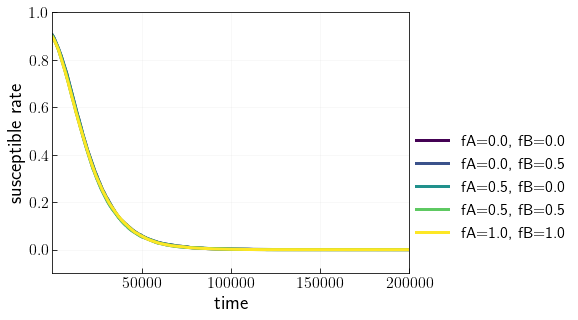

In [21]:
colormap = plt.cm.get_cmap('viridis', len(labels))

for i, df in enumerate(dfs):
    plt.plot(df.step, df.susceptibleRate, label=labels[i], color=colormap(i))

plt.ylabel('susceptible rate')
plt.xlabel("time")
plt.xlim(1, 200000)
plt.ylim(-0.1, 1)
plt.legend(loc=(1, 0.1))

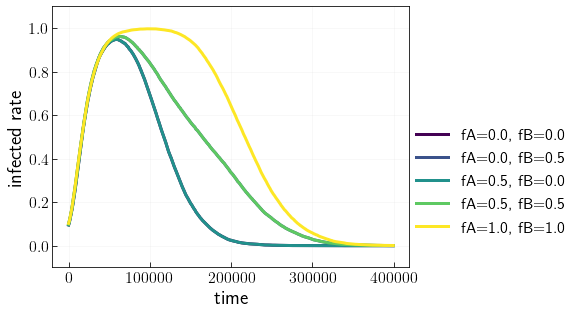

In [22]:
for i, df in enumerate(dfs):
    plt.plot(df.step, df.infectedRate, label=labels[i], color=colormap(i))

plt.ylabel('infected rate')
plt.xlabel("time")
plt.ylim(-0.1, 1.1)
plt.legend(loc=(1, 0.1))

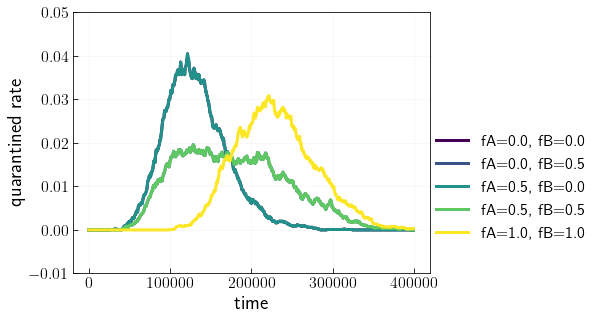

In [23]:
for i, df in enumerate(dfs):
    plt.plot(df.step, df.quarantinedRate, label=labels[i], color=colormap(i))

plt.ylabel('quarantined rate')
plt.xlabel("time")
# plt.xlim(1, 200000)
plt.ylim(-0.01, 0.05)
plt.legend(loc=(1, 0.1))

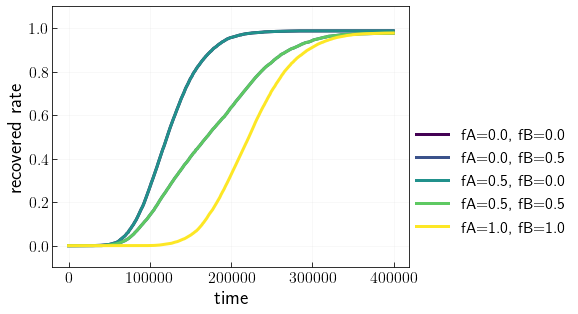

In [50]:
for i, df in enumerate(dfs):
    plt.plot(df.step, df.recoveredRate, label=labels[i], color=colormap(i))

plt.ylabel('recovered rate')
plt.xlabel("time")
plt.ylim(-0.1, 1.1)
plt.legend(loc=(1, 0.1))

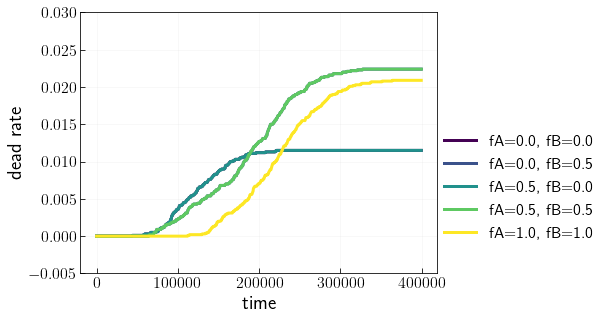

In [49]:
for i, df in enumerate(dfs):
    plt.plot(df.step, df.deadRate, label=labels[i], color=colormap(i))

plt.ylabel('dead rate')
plt.xlabel("time")
plt.ylim(-0.005, 0.03)
plt.legend(loc=(1, 0.1))

In [75]:
colors = ['blue', 'black', 'red', 'green', 'violet']
colors = ['xkcd:' + c for c in colors]

def plot_epidemic(n, legend=False, xlabel=False):
    df = dfs[n]

    plt.plot(df.step, df.susceptibleRate, label='susceptible rate', color=colors[0])
    plt.plot(df.step, df.deadRate, label='dead rate', color=colors[1])
    plt.plot(df.step, df.infectedRate, label='infected rate', color=colors[2])
    plt.plot(df.step, df.recoveredRate, label='recovered rate', color=colors[3])
    plt.plot(df.step, df.quarantinedRate, label='quarantine rate', color=colors[4])
    
    if xlabel:
        plt.xlabel("$t$")

    plt.ylim(-0.1, 1.1)
    plt.title(f'${labels[n]}$')
    if legend:
        plt.legend(loc=(1, 0.2))

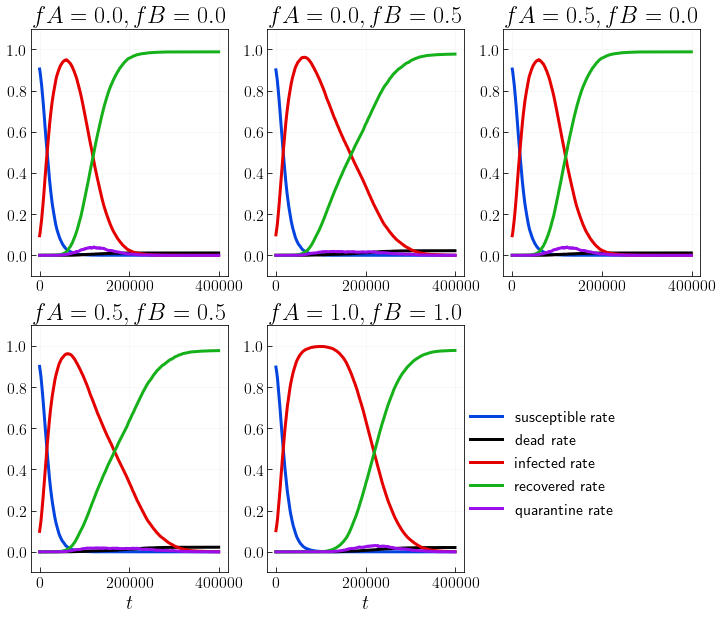

In [76]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
plot_epidemic(0)

plt.subplot(2, 3, 2)
plot_epidemic(1)

plt.subplot(2, 3, 3)
plot_epidemic(2)

plt.subplot(2, 3, 4)
plot_epidemic(3,  xlabel=True)

plt.subplot(2, 3, 5)
plot_epidemic(4, legend=True, xlabel=True)